# Induction Machine Performance

`````{grid}

````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec26/Slide2.PNG" align="left" width="62%">

We will study the performance calculation of the induction machine further based on the operation principle and equivalent circuit model we learned in the last lecture.

After taking the lecture, we should be able to apply the equivalent circuit to address the induction machine related problems, including power, loss and efficiency calculations.
We will also study the torque speed characteristic of the induction machine.
After taking the lecture, you should be able to plot the torque speed curve of the induction machine and evaluate the performance of the induction machine based on it.

````
`````

## Induction machine rotor copper loss



`````{grid}

````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec26/Slide8.PNG" align="left" width="62%">

Hereby we start with the rotor loss calculation of the induction machine.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide9.PNG" align="left" width="62%">

To obtain the equivalent circuit of the induction machine, the rotor resistance is divided by $s$ so that the rotor circuit frequency matches that of the stator. However, only the original rotor resistance $r_r$ represents the copper loss production. Therefore, the total resistance $r_r/s$ can be divided into two parts:

$$
\frac{r_r}{s} = r_r + \frac{1-s}{s}r_r.
$$

The first item on the right represents the rotor copper loss.
We know the total power flows to the rotor circuit per phase is $I_r^2 \frac{r_r}{s}$, according to conservation of energy, the mechanical power output of the rotor per phase would be

$$
P_{out, \phi} = I_r^2\frac{r_r}{s} - I_r^2 r_r = I_r^2 \frac{1-s}{s}r_r.
$$

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide10.PNG" align="left" width="62%">

The example here is used to show how the stator and rotor losses are calculated inside the induction machine.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide11.PNG" align="left" width="62%">

We first have to calculate the stator and rotor current phasors as we have done in the homework of the last lecture.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide12.PNG" align="left" width="62%">

Afterwards, we can calculate input power, and stator/rotor losses.

```{attention}
The power and losses calculated from the equivalent circuit is just for one phase. We should multiply the results by 3 to obtain the total ones.

The copper loss per phase on the rotor side is $I_r^2r_r$, not $I_r^2r_r/s$. The script below shows the calculation procedure.

```
````
`````

In [1]:
import numpy as np
from IPython.display import display, Markdown, Math, Latex

V_ll = 400.0
f    = 50.0
P    = 4
n    = 1425
P_out = 14.0*745.7 # convert to watts
r_s   = 0.5
r_r   = 0.35
X_s   = 1.3
X_r   = 1
X_m   = 350

# synchronous speed
n_s = f*60/(P/2)
# slip
s   = (n_s-n)/n_s

# stator current
# input impedance
Z_in = r_s + 1j*X_s + (1/(1j*X_m)+1/(1j*X_r+r_r/s))**(-1)
V_ph = V_ll/np.sqrt(3)
I_s  = V_ph/Z_in

# rotor current
V_r  = V_ph - I_s*(r_s+1j*X_s)
I_r  = V_r/(1j*X_r+r_r/s)

# input power
P_in = 3*(V_ph*I_s.conj()).real
print(f'1. The input power is {P_in:.2f} W.')

# stator winding loss
p_s  = 3*abs(I_s)**2*r_s
print(f'2. The stator winding loss is {p_s:.2f} W.')

# rotor winding loss
p_r  = 3*abs(I_r)**2*r_r
print(f'2. The rotor winding loss is {p_r:.2f} W.')

1. The input power is 19386.72 W.
2. The stator winding loss is 1299.83 W.
2. The rotor winding loss is 904.34 W.


## Power flow in induction machines



`````{grid}

````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec26/Slide13.PNG" align="left" width="62%">

The power flow inside the synchronous machine is more complicated compared to the synchronous machine, because there is also ac winding on the rotor side, which results in copper loss as well.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide14.PNG" align="left" width="62%">

Following the motor notation, the power low of the induction machine is shown on the slide. The total input electrical power *per phase* can be calculated as

$$
P_{in,\phi} = \Re\{ \mathbf{V}_\phi \mathbf{I}_\phi^* \}.
$$

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide15.PNG" align="left" width="62%">

As the electrical power enters the stator, part of it will contribute to the loss in the core, which is called *magnetisation loss* or *iron loss*, which compromises the eddy current loss and hysteresis loss inside the magnetic core material.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide16.PNG" align="left" width="62%">

Part of the power enters the stator will be taken as the loss in the stator winding, which is called stator copper loss. 

The stator copper loss per phase is calculated as

$$
P_{cus,\phi} = |\mathbf{I}_s|^2r_s.
$$

The rest of the power enters the air gap, and is defined as the air gap power $P_{gap}$.

Furthermore, the copper loss in the rotor winding is taken from the air gap power. The per phase rotor copper loss is

$$
P_{cur,\phi} = |\mathbf{I}_r|^2r_r.
$$

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide17.PNG" align="left" width="62%">

We are able to calculate the air gap power in two ways.

From the rotor circuit, the total rotor power should be the air gap power, so we have the per phase air gap power

$$
P_{gap,\phi} = |\mathbf{I}_r|^2\frac{r_r}{s}.
$$

From the stator side, we know the air gap power should be the total input power minus the stator copper loss and iron loss

$$
P_{gap,\phi} = P_{in,\phi} - P_{cus,\phi} - P_{mag,\phi}.
$$

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide18.PNG" align="left" width="62%">

The air gap power includes both the rotor copper loss and the developed mechanical power on the rotor. The per phase developed mechanical power is

$$
P_{dev, \phi} = P_{gap,\phi} - P_{cur,\phi}.
$$

We could also calculate it from the rotor current and rotor resistance component:

$$
P_{dev,\phi} = |\mathbf{I}_r|^2\frac{1-s}{s}r_r.
$$

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide19.PNG" align="left" width="62%">

Not all the developed mechanical power will be taken by the load. Part of it is taken by the mechanical losses, which include the windage loss caused by air friction, and other friction losses from the bearings.

The mechanical output power per phase would be

$$
P_{o,\phi} = P_{dev,\phi} - P_{wf,\phi}.
$$

where $P_{wf,\phi}$ is the windage and friction loss averaged to each phase.

The efficiency of the induction machine is then

$$
\eta = \frac{P_o}{P_{in}},
$$

where $P_o$ and $P_{in}$ are the total output power and the total input power respectively.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide20.PNG" align="left" width="62%">

To obtain the torque from the calculated power, we first have to calculate the rotor mechanical speed.

Suppose the stator supply frequency is $f$.
The synchronous speed would be $n_s = 120f/P$.
The synchronous angular speed is then

$$
\omega_{ms} = \frac{2\pi f}{P/2}.
$$

The rotor mechanical speed becomes

$$
n = (1-s)n_s = (1-s)\frac{60f}{P/2}.
$$

The rotor mechanical angular speed is then

$$
\omega_{mec} = (1-s)\omega_{ms} = (1-s)\frac{2\pi f}{P/2}.
$$

The mechanical output torque is calculated from the total output power and the rotor mechanical angular speed

$$
T_o = \frac{3P_{o,\phi}}{\omega_{mec}}.
$$

If we neglect the mechanical losses (windage and friction), then the developed power is the same as the output power, so the output torque is also the developed torque

$$
\begin{align}
T_o &= T_{dev} = \frac{3P_{o,\phi}}{\omega_{mec}} \\
    &= \frac{3P_{dev,\phi}}{(1-s)\omega_{ms}}
    &= \frac{3P_{gap,\phi}}{\omega_{ms}}.
\end{align}
$$

Now we can see, if the mechanical losses are neglected, we are able to calculate the output torque from either the developed torque and the rotor mechanical angular speed, or from the air gap power and the synchronous mechanical speed.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide21.PNG" align="left" width="62%">

This example here is used to practice the power, loss and efficiency calculation of the induction machine.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide22.PNG" align="left" width="62%">

The input current is again calculated from the input impedance.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide23.PNG" align="left" width="62%">

The input power is then calculated from the voltage and current phasor, so is the power factor.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide24.PNG" align="left" width="62%">

Here when we are calculating the power and torque, we should pay attention that the magnetising loss and the mechanical loss are given as the total loss of all the three phases, while the power calculated from the equivalent circuit is for one phase only. 

The script below shows the calculation procedure.
````
`````

In [2]:
import numpy as np
from IPython.display import display, Markdown, Math, Latex

V_ll = 400.0
f    = 50.0
P    = 4
s    = 0.03
P_mag = 250.0
P_wf  = 420.0
r_s   = 0.3
r_r   = 0.2
X_s   = 1.1
X_r   = 0.8
X_m   = 250

# synchronous speed
n_s = f*60/(P/2)
omega_mec = f*2*np.pi/(P/2)*(1-s)

# stator current
# input impedance
Z_in = r_s + 1j*X_s + (1/(1j*X_m)+1/(1j*X_r+r_r/s))**(-1)
V_ph = V_ll/np.sqrt(3)
I_s  = V_ph/Z_in

# rotor current
V_r  = V_ph - I_s*(r_s+1j*X_s)
I_r  = V_r/(1j*X_r+r_r/s)

# 1. input current
print(f'1. The input current phasor is {I_s:.2f} A, or')
display(Math('$\mathbf{{I}}_s={:.2f}\\angle{:.2f}^\circ \mathrm{{A}}$'.format(abs(I_s), np.angle(I_s)/np.pi*180)))

# 2. input power and power factor
P_in = 3*(V_ph*I_s.conj()).real
print(f'2. The input power is {P_in:.2f} W.')
print(f'The power factor is pf = {I_s.real/abs(I_s):.2f}, lagging.')

# 3. output torque and efficiency
# air gap power
P_ag = P_in-P_mag - 3*abs(I_s)**2*r_s
# developed power
P_dev = (1-s)*P_ag
# output mechanical power
P_o   = P_dev - P_wf
# torque
T_o = P_o/omega_mec
eta = P_o/P_in

print(f'3. The output torque is {T_o:.2f} Nm.')
print(f'The efficiency is {eta:.2%}.')

1. The input current phasor is 30.63-9.18j A, or


<IPython.core.display.Math object>

2. The input power is 21217.87 W.
The power factor is pf = 0.96, lagging.
3. The output torque is 124.87 Nm.
The efficiency is 89.67%.


## Torque-speed curve



`````{grid}

````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec26/Slide25.PNG" align="left" width="62%">

The last part of the lecture is on the torque-speed characteristic of the induction machine.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide26.PNG" align="left" width="62%">

The torque-speed characteristic of the induction machine shows how the torque of the induction machine varies as speed changes.

To simplify the analysis, we may neglect the magnetising inductance in the equivalent circuit, since it is usually much larger than the two leakage inductances, and only takes reactive power. Then the total input impedance becomes

$$
\mathbf{Z}_t = r_s+\frac{r_r}{s} + j(X_s+X_r).
$$

The rotor current is then calculated as

$$
\mathbf{I}_r = \frac{V_{in}}{r_s+\frac{r_r}{s} + j(X_s+X_r)}.
$$

The total air gap power is then

$$
\begin{align}
P_{gap} &= 3|\mathbf{I}_r|^2\frac{r_r}{s} \\
&= \frac{3V_{in}^2}{(r_s+\frac{r_r}{s})^2 + (X_s+X_r)^2}\frac{r_r}{s}.
\end{align}
$$

The output torque, neglecting the mechanical and iron losses, is calculated from the air gap power and the synchronous angular speed $\omega_{ms}$.

$$
\begin{align}
T &= \frac{P_{gap}}{\omega_{ms}} \\
  &= \frac{1}{s\omega_{ms}}\frac{3V_{in}^2r_r}{(r_s+\frac{r_r}{s})^2 + (X_s+X_r)^2}.
\end{align}
$$

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide27.PNG" align="left" width="62%">

The simplified torque expression is a function of the slip $s$.

Let us simplify the expression further by looking at two extreme scenarios.

If the slip $s$ is very small, then $r_s/s$ becomes dominant in the denominator.
The rotor current is dominated by the circuit resistances, so we call this operation condition *resistance limited operation*.
The torque expression is further simplified to

$$
\begin{align}
T &\approx \frac{r_r}{s\omega_{ms}}\frac{3V_{in}^2}{(\frac{r_r}{s})^2} \\
&=3V_{in}^2\frac{s}{r_r\omega_{ms}}.
\end{align}
$$

so when $s$ is sufficiently low, i.e., when the rotor rotating speed is close to the synchronous speed, the torque $T$ is a linear proportion function of the slip $s$.

When $s$ is very large, the $r_r+r_r/s$ part becomes negligible, so the circuit reactance $X_s+X_r$ becomes dominant. The rotor current will also be limited by them, so we call this operation condition *inductance limited operation*.
The torque equation is then simplified to

$$
T \approx \frac{r_r}{s\omega_{ms}}\frac{3V_{in}^2}{(X_s+X_r)^2}.
$$

so when the slip $s$ is sufficiently large, i.e., close to the standstill operation, or the *block-rotor* condition, the torque is inversely proportional to the slip.

By combining the two parts, the typical torque-speed characteristic can be depicted as in the figure on the bottom.
Some typical operation points in the torque-speed curve are given in the figure, which are 

* point a: locked rotor torque, starting torque or blocked rotor torque
* point b: pull up torque
* point c: breakdown torque
* point d: 1.5 load torque
* point e: rated load torque
* point $\omega_{ms}$: no-load speed

Detailed explanations are available on the slides below.

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide28.PNG" align="left" width="62%">

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide29.PNG" align="left" width="62%">

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide30.PNG" align="left" width="62%">

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide31.PNG" align="left" width="62%">

````
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec26/Slide32.PNG" align="left" width="62%">

To fit various loads, the induction machines have to be designed to have different torque-speed curves which fit specific applications better.
Usually the induction machines can be classified based on the shapes of their torque-speed curves.

The classifications are defined in standards, e.g., in the US, in NEMA standard, and IEC60034-1 in Europe.

Typical design types for induction machines are shown in the figure on the right.
Various designs are achieved by changing the geometrical parameters, e.g. number of turns, rotor slot shape, and length-diameter ratios etc.

In this lecture, we only study the motor operation of the induction machine. However, it should be noted that the induction machine is also able to operate as a generator, if the slip $s$ becomes negative.

The script below shows how to plot the torque-speed curve of the induction machine of the previous example, neglecting iron and mechanical losses. In the plotted torque-speed curve, we can clearly see the torque is zero at synchronous speed, and the machine operates in the motor mode (T>0) when the slip is positive, and in generator mode (T<0) when the slip is negative.

````
`````

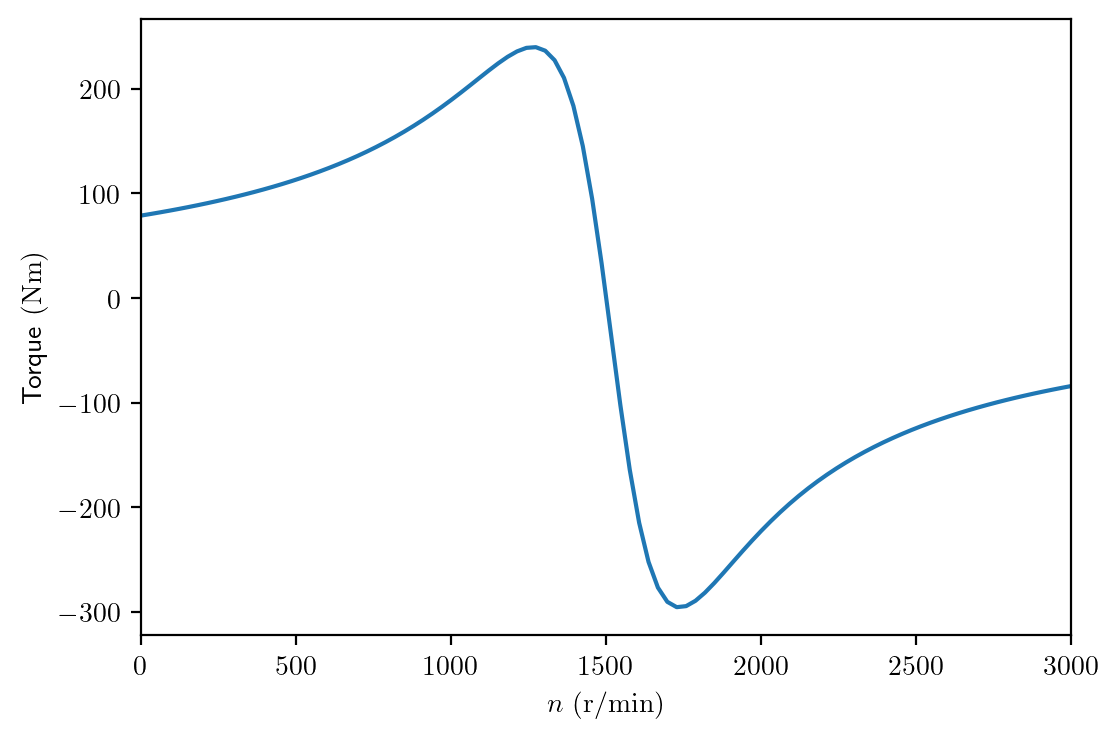

In [3]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6 , 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

# IM: 400 V, 4-pole, 50 Hz, Y connected
Vll = 400
p  = 2  # 4-pole

Xs = 1.1
Xr = 0.8
Xm = 250
rr = 0.3
rs = 0.2

Vph = Vll/np.sqrt(3) # Y connected
f   = 50.0
ns  = 60*f/p  # 4-pole
omegas = 2*np.pi*f # electrical angular speed


# calculate in array
n = np.linspace(0, 3000, 100)
s = (ns-n)/ns

Zr = np.divide(rr,s) + 1j*Xr
Zm = 1/(1/(1j*Xm)+1/Zr)
Ztot = Zm + rs + 1j*Xs

Is   = Vph/Ztot
Pin  = 3*np.real(Vph*np.conj(Is))
Pag  = Pin - 3*np.absolute(Is)**2*rs
T    = Pag/(ns/60*2*np.pi)

plt.plot(n, T)
plt.xlabel('$n~(\mathrm{r/min})$')
plt.ylabel('Torque$~(\mathrm{Nm})$')
plt.xlim([0, 3000])
plt.show()